Battery at (38, 12):
  Total output connected: 2660.07912819
  Total cables used: 410
Battery at (43, 13):
  Total output connected: 91.18148259
  Total cables used: 7
Battery at (42, 3):
  Total output connected: 1093.11219954
  Total cables used: 204
Battery at (49, 23):
  Total output connected: 918.3915552000001
  Total cables used: 115
Battery at (3, 45):
  Total output connected: 2737.23563448
  Total cables used: 397


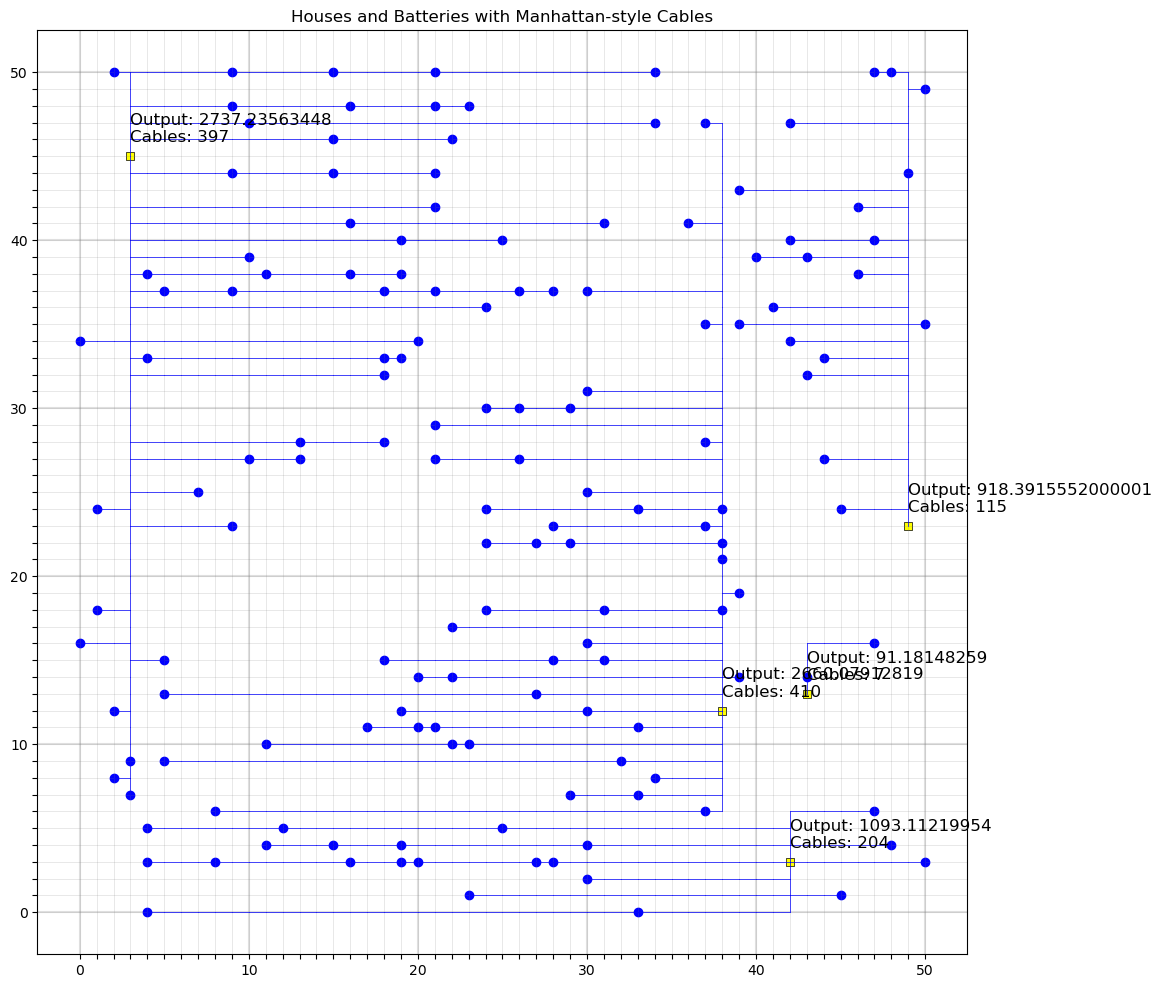

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from experiment import Experiment as experiment

# Create an instance of the Experiment class
battery_district1_link = 'Huizen&Batterijen/district_1/district-1_batteries.csv'
house_district1_link = 'Huizen&Batterijen/district_1/district-1_houses.csv'
experiment_instance = experiment(house_district1_link, battery_district1_link)

"""
This file contains the code to plot the houses and batteries with the Manhattan-style cables used in the experiment class
"""

# Create a figure and 50x50 grid
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xticks(np.arange(0, 51, 1))
ax.set_yticks(np.arange(0, 51, 1))

# Draw grid with grey lines
ax.grid(linestyle='-', linewidth='0.5', alpha=0.25, color='grey', zorder=0)

# Draw thicker grey lines for every 10th line
for i in range(0, 51, 10):
    ax.axvline(x=i, color='grey', linestyle='-', linewidth=1.5, alpha=0.25, zorder=0)
    ax.axhline(y=i, color='grey', linestyle='-', linewidth=1.5, alpha=0.25, zorder=0)

# Set labels for every 10th line
ax.set_xticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])
ax.set_yticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])

# Plot houses
for house in experiment_instance.houses:
    plt.scatter(house.x, house.y, color='blue', label='House')

# Plot batteries
for battery in experiment_instance.batteries:
    plt.scatter(battery.x, battery.y, color='yellow', edgecolors='black', linewidth=0.5, marker='s', label='Battery')
    
    # Calculate and annotate total output and total cables for each battery
    total_output = sum(house.maxoutput for house in battery.connected_houses)

    # Create a set of all cables connected to the battery
    battery_cables = set()

    # Add all cables connected to the battery to the set
    for house in battery.connected_houses:
        battery_cables.update(experiment_instance.get_cables_for_route(house, battery))
    
    # Calculate the total amount of cables connected to the battery
    total_cables = len(battery_cables)

    # Annotate the battery with the total output and total cables
    plt.annotate(f'Output: {total_output}\nCables: {total_cables}', 
                 (battery.x, battery.y), textcoords="offset points", 
                 xytext=(0,10), ha='right', fontsize=12, color='black')

# Plot cables
for cable in experiment_instance.cables:
    plt.plot([cable.start_x, cable.end_x], [cable.start_y, cable.end_y], 
             'b-', linewidth=0.5)

plt.title('Houses and Batteries with Manhattan-style Cables')
plt.show()

